# Content Recommender
With the content-based filtering we will (based on one movie choice) recommends movies by finding similar movies based on the movie genre, overview and crew.

In [1]:
import modules.recommmender.ContentRecommender as cr
import modules.wordclouds.WordCloud as wc

#### Get data
We are going to use data about movies and credits. We load our datasets from our folder "data".

In [2]:
movies_df = cr.load_movies()
movies_df.head()

,Unnamed: 0,Movie_id,title,Genres,release_date,Keywords,overview,poster_path,Budget,Revenue,popularity,vote_average,vote_count
0,0,238,The Godfather,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",1972-03-14,"[{'id': 131, 'name': 'italy'}, {'id': 697, 'na...","Spanning the years 1945 to 1955, a chronicle o...",/3bhkrj58Vtu7enYsRolD1fZdja1.jpg,245066411,245066411,93.552,8.7,16814
1,1,278,The Shawshank Redemption,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",1994-09-23,"[{'id': 378, 'name': 'prison'}, {'id': 417, 'n...",Framed in the 1940s for the double murder of h...,/q6y0Go1tsGEsmtFryDOJo3dEmqu.jpg,28341469,28341469,78.664,8.7,22542
2,2,240,The Godfather Part II,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",1974-12-20,"[{'id': 131, 'name': 'italy'}, {'id': 700, 'na...",In the continuing saga of the Corleone crime f...,/hek3koDUyRQk7FIhPXsa6mT2Zc3.jpg,102600000,102600000,55.752,8.6,10187
3,3,19404,Dilwale Dulhania Le Jayenge,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",1995-10-19,[],"Raj is a rich, carefree, happy-go-lucky second...",/2CAL2433ZeIihfX1Hb2139CX0pW.jpg,100000000,100000000,22.150,8.6,3927
4,4,424,Schindler's List,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",1993-12-15,"[{'id': 818, 'name': 'based on novel or book'}...",The true story of how businessman Oskar Schind...,/sF1U4EUQS8YHUYjNl3pMGNIQyr0.jpg,321365567,321365567,53.542,8.6,13382


In [3]:
movies_df.shape

(9980, 13)

In [4]:
credits_df = cr.load_credits()
credits_df.head()

,Unnamed: 0,Movie_id,title,Cast,Crew
0,0,238,The Godfather,"[{'adult': False, 'gender': 2, 'id': 3084, 'kn...","[{'adult': False, 'gender': 2, 'id': 154, 'kno..."
1,1,278,The Shawshank Redemption,"[{'adult': False, 'gender': 2, 'id': 504, 'kno...","[{'adult': False, 'gender': 2, 'id': 153, 'kno..."
2,2,240,The Godfather Part II,"[{'adult': False, 'gender': 2, 'id': 1158, 'kn...","[{'adult': False, 'gender': 2, 'id': 154, 'kno..."
3,3,19404,Dilwale Dulhania Le Jayenge,"[{'adult': False, 'gender': 2, 'id': 35742, 'k...","[{'adult': False, 'gender': 1, 'id': 8311, 'kn..."
4,4,424,Schindler's List,"[{'adult': False, 'gender': 2, 'id': 3896, 'kn...","[{'adult': False, 'gender': 2, 'id': 491, 'kno..."


In [5]:
credits_df.shape

(9980, 5)

#### Preparing data
We will now clean the credits dataframe.

In [6]:
# drop title column
credits_df = cr.prepare_credits(credits_df)
credits_df.head()

,Unnamed: 0,Movie_id,Cast,Crew
0,0,238,"[{'adult': False, 'gender': 2, 'id': 3084, 'kn...","[{'adult': False, 'gender': 2, 'id': 154, 'kno..."
1,1,278,"[{'adult': False, 'gender': 2, 'id': 504, 'kno...","[{'adult': False, 'gender': 2, 'id': 153, 'kno..."
2,2,240,"[{'adult': False, 'gender': 2, 'id': 1158, 'kn...","[{'adult': False, 'gender': 2, 'id': 154, 'kno..."
3,3,19404,"[{'adult': False, 'gender': 2, 'id': 35742, 'k...","[{'adult': False, 'gender': 1, 'id': 8311, 'kn..."
4,4,424,"[{'adult': False, 'gender': 2, 'id': 3896, 'kn...","[{'adult': False, 'gender': 2, 'id': 491, 'kno..."


In [7]:
credits_df.shape

(9980, 4)

#### Transformation
We will now merge the dataframe to get a single dataframe we will use for our modelling. We will also reduce the size of dataframe by removing movies that do not have a high rating count.

##### Merging movies and credits into one dataframe

In [8]:
df = cr.merge_movies_and_credits(movies_df, credits_df)
df.head()

,Unnamed: 0_x,Movie_id,title,Genres,release_date,Keywords,overview,poster_path,Budget,Revenue,popularity,vote_average,vote_count,Unnamed: 0_y,Cast,Crew
0,0,238,The Godfather,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",1972-03-14,"[{'id': 131, 'name': 'italy'}, {'id': 697, 'na...","Spanning the years 1945 to 1955, a chronicle o...",/3bhkrj58Vtu7enYsRolD1fZdja1.jpg,245066411,245066411,93.552,8.7,16814,0,"[{'adult': False, 'gender': 2, 'id': 3084, 'kn...","[{'adult': False, 'gender': 2, 'id': 154, 'kno..."
1,1,278,The Shawshank Redemption,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",1994-09-23,"[{'id': 378, 'name': 'prison'}, {'id': 417, 'n...",Framed in the 1940s for the double murder of h...,/q6y0Go1tsGEsmtFryDOJo3dEmqu.jpg,28341469,28341469,78.664,8.7,22542,1,"[{'adult': False, 'gender': 2, 'id': 504, 'kno...","[{'adult': False, 'gender': 2, 'id': 153, 'kno..."
2,2,240,The Godfather Part II,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",1974-12-20,"[{'id': 131, 'name': 'italy'}, {'id': 700, 'na...",In the continuing saga of the Corleone crime f...,/hek3koDUyRQk7FIhPXsa6mT2Zc3.jpg,102600000,102600000,55.752,8.6,10187,2,"[{'adult': False, 'gender': 2, 'id': 1158, 'kn...","[{'adult': False, 'gender': 2, 'id': 154, 'kno..."
3,3,19404,Dilwale Dulhania Le Jayenge,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",1995-10-19,[],"Raj is a rich, carefree, happy-go-lucky second...",/2CAL2433ZeIihfX1Hb2139CX0pW.jpg,100000000,100000000,22.150,8.6,3927,3,"[{'adult': False, 'gender': 2, 'id': 35742, 'k...","[{'adult': False, 'gender': 1, 'id': 8311, 'kn..."
4,4,424,Schindler's List,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",1993-12-15,"[{'id': 818, 'name': 'based on novel or book'}...",The true story of how businessman Oskar Schind...,/sF1U4EUQS8YHUYjNl3pMGNIQyr0.jpg,321365567,321365567,53.542,8.6,13382,4,"[{'adult': False, 'gender': 2, 'id': 3896, 'kn...","[{'adult': False, 'gender': 2, 'id': 491, 'kno..."


In [9]:
df.shape

(9980, 16)

##### Clean the merged dataframe
We will select the columns we will need, plus remove the NaN values from the dataframe.

In [10]:
df = df[['Movie_id', 'title', 'Genres', "Keywords", 'overview', 'Cast', 'Crew']]
df.dropna(inplace=True)
df.head()

,Movie_id,title,Genres,Keywords,overview,Cast,Crew
0,238,The Godfather,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...","[{'id': 131, 'name': 'italy'}, {'id': 697, 'na...","Spanning the years 1945 to 1955, a chronicle o...","[{'adult': False, 'gender': 2, 'id': 3084, 'kn...","[{'adult': False, 'gender': 2, 'id': 154, 'kno..."
1,278,The Shawshank Redemption,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...","[{'id': 378, 'name': 'prison'}, {'id': 417, 'n...",Framed in the 1940s for the double murder of h...,"[{'adult': False, 'gender': 2, 'id': 504, 'kno...","[{'adult': False, 'gender': 2, 'id': 153, 'kno..."
2,240,The Godfather Part II,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...","[{'id': 131, 'name': 'italy'}, {'id': 700, 'na...",In the continuing saga of the Corleone crime f...,"[{'adult': False, 'gender': 2, 'id': 1158, 'kn...","[{'adult': False, 'gender': 2, 'id': 154, 'kno..."
3,19404,Dilwale Dulhania Le Jayenge,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",[],"Raj is a rich, carefree, happy-go-lucky second...","[{'adult': False, 'gender': 2, 'id': 35742, 'k...","[{'adult': False, 'gender': 1, 'id': 8311, 'kn..."
4,424,Schindler's List,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...","[{'id': 818, 'name': 'based on novel or book'}...",The true story of how businessman Oskar Schind...,"[{'adult': False, 'gender': 2, 'id': 3896, 'kn...","[{'adult': False, 'gender': 2, 'id': 491, 'kno..."


In [11]:
df.shape

(9974, 7)

##### Convert data
We will convert some data by traverse through the syntax tree and converts the values to a list of words.

In [12]:
# we will convert the data for genres, keywords, cast, crew & overview
df = cr.convert_data(df)
df.head()

,Movie_id,title,Genres,Keywords,overview,Cast,Crew
0,238,The Godfather,"[Drama, Crime]","[italy, lossoflovedone, loveatfirstsight, base...","[Spanning, the, years, 1945, to, 1955,, a, chr...","[MarlonBrando, AlPacino, JamesCaan]",[FrancisFordCoppola]
1,278,The Shawshank Redemption,"[Drama, Crime]","[prison, corruption, policebrutality, basedonn...","[Framed, in, the, 1940s, for, the, double, mur...","[TimRobbins, MorganFreeman, BobGunton]",[FrankDarabont]
2,240,The Godfather Part II,"[Drama, Crime]","[italy, italianamerican, cuba, symbolism, gang...","[In, the, continuing, saga, of, the, Corleone,...","[AlPacino, RobertDuvall, DianeKeaton]",[FrancisFordCoppola]
3,19404,Dilwale Dulhania Le Jayenge,"[Comedy, Drama, Romance]",[],"[Raj, is, a, rich,, carefree,, happy-go-lucky,...","[ShahRukhKhan, Kajol, AmrishPuri]",[AdityaChopra]
4,424,Schindler's List,"[Drama, History, War]","[basedonnovelorbook, factory, concentrationcam...","[The, true, story, of, how, businessman, Oskar...","[LiamNeeson, BenKingsley, RalphFiennes]",[StevenSpielberg]


In [13]:
df.shape

(9974, 7)

##### Create a column with tags
The tag column will combine words from genres, keywords, cast, crew & overview.

In [14]:
df = cr.generate_tags(df)
df.head()

,Movie_id,title,Genres,Keywords,overview,Cast,Crew,tags
0,238,The Godfather,"[Drama, Crime]","[italy, lossoflovedone, loveatfirstsight, base...","[Spanning, the, years, 1945, to, 1955,, a, chr...","[MarlonBrando, AlPacino, JamesCaan]",[FrancisFordCoppola],drama crime italy lossoflovedone loveatfirstsi...
1,278,The Shawshank Redemption,"[Drama, Crime]","[prison, corruption, policebrutality, basedonn...","[Framed, in, the, 1940s, for, the, double, mur...","[TimRobbins, MorganFreeman, BobGunton]",[FrankDarabont],drama crime prison corruption policebrutality ...
2,240,The Godfather Part II,"[Drama, Crime]","[italy, italianamerican, cuba, symbolism, gang...","[In, the, continuing, saga, of, the, Corleone,...","[AlPacino, RobertDuvall, DianeKeaton]",[FrancisFordCoppola],drama crime italy italianamerican cuba symboli...
3,19404,Dilwale Dulhania Le Jayenge,"[Comedy, Drama, Romance]",[],"[Raj, is, a, rich,, carefree,, happy-go-lucky,...","[ShahRukhKhan, Kajol, AmrishPuri]",[AdityaChopra],comedy drama romance shahrukhkhan kajol amrish...
4,424,Schindler's List,"[Drama, History, War]","[basedonnovelorbook, factory, concentrationcam...","[The, true, story, of, how, businessman, Oskar...","[LiamNeeson, BenKingsley, RalphFiennes]",[StevenSpielberg],drama history war basedonnovelorbook factory c...


In [15]:
df.shape

(9974, 8)

#### Modelling

In [16]:
matrix = cr.create_matrix_of_tag_words(df)
matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [17]:
matrix.shape

(9974, 8000)

In [18]:
similarity = cr.find_similarities(matrix)
similarity

array([[1.        , 0.15118579, 0.43826153, ..., 0.06482037, 0.01801875,
        0.14580296],
       [0.15118579, 1.        , 0.08834522, ..., 0.03429972, 0.0381385 ,
        0.        ],
       [0.43826153, 0.08834522, 1.        , ..., 0.1136331 , 0.        ,
        0.13631964],
       ...,
       [0.06482037, 0.03429972, 0.1136331 , ..., 1.        , 0.0327035 ,
        0.13231403],
       [0.01801875, 0.0381385 , 0.        , ..., 0.0327035 , 1.        ,
        0.        ],
       [0.14580296, 0.        , 0.13631964, ..., 0.13231403, 0.        ,
        1.        ]])

In [19]:
similarity.shape

(9974, 9974)

#### Result
The result of our modelling

In [20]:
# choose movie and size of recommendation
movie_title = "Harry Potter and the Goblet of Fire"
recommends_size = 5

In [21]:
recommends = cr.recommend_movies(movie_title, recommends_size)
recommends

['Harry Potter and the Deathly Hallows: Part 2',
 'Harry Potter and the Prisoner of Azkaban',
 "Harry Potter and the Philosopher's Stone",
 'Harry Potter and the Order of the Phoenix',
 'Harry Potter and the Chamber of Secrets']

##### WordCloud of the recommendation tags
Here is a wordcloud of the words from the recommendation tags:

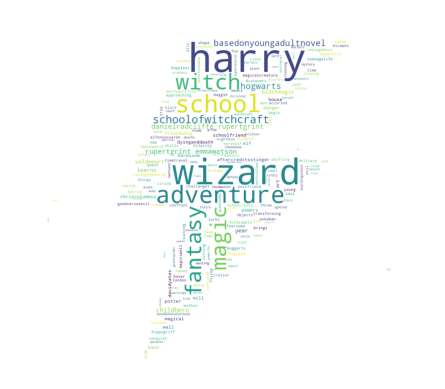

In [22]:
indexes = [cr.get_movie_index_by_title(df, title) for title in recommends]
text = ' '.join(df.at[index, 'tags'] for index in indexes)
cloud = wc.create_image_cloud(text, "images/ligtning_scar.png")
wc.show_cloud(cloud)